# Missao:


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por dia que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Obtendo dados

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de dados exploratória

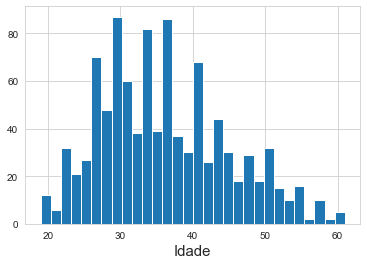

In [6]:
#Histograma por idade
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Idade',size=15)
plt.show()

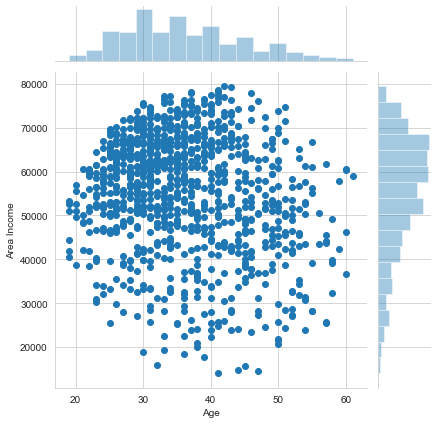

In [7]:
# Analisando relacao Idade Consumidor x Renda Media por Regiao
sns.jointplot(data=df,y='Area Income',x='Age')
plt.show()

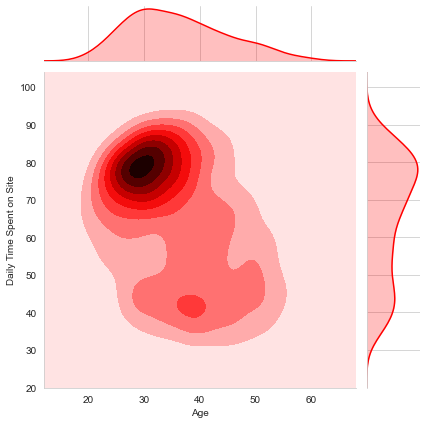

In [8]:
# Analisando relacao Idade Consumidor x Tempo Medio Gasto no Site
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde',color='red')
plt.show()

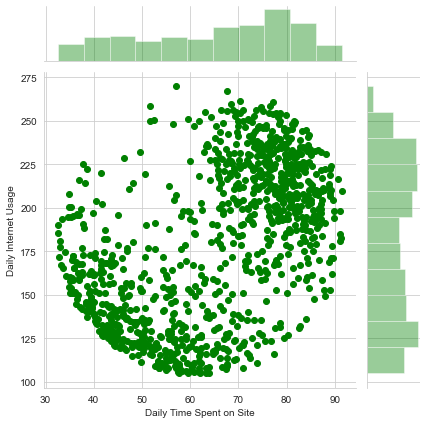

In [9]:
# Analisando relacao Tempo Medio Gasto no Site x Média do Consumidor por dia Gasta na internet
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')
plt.show()

** Finalmente, crie um parplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'. **

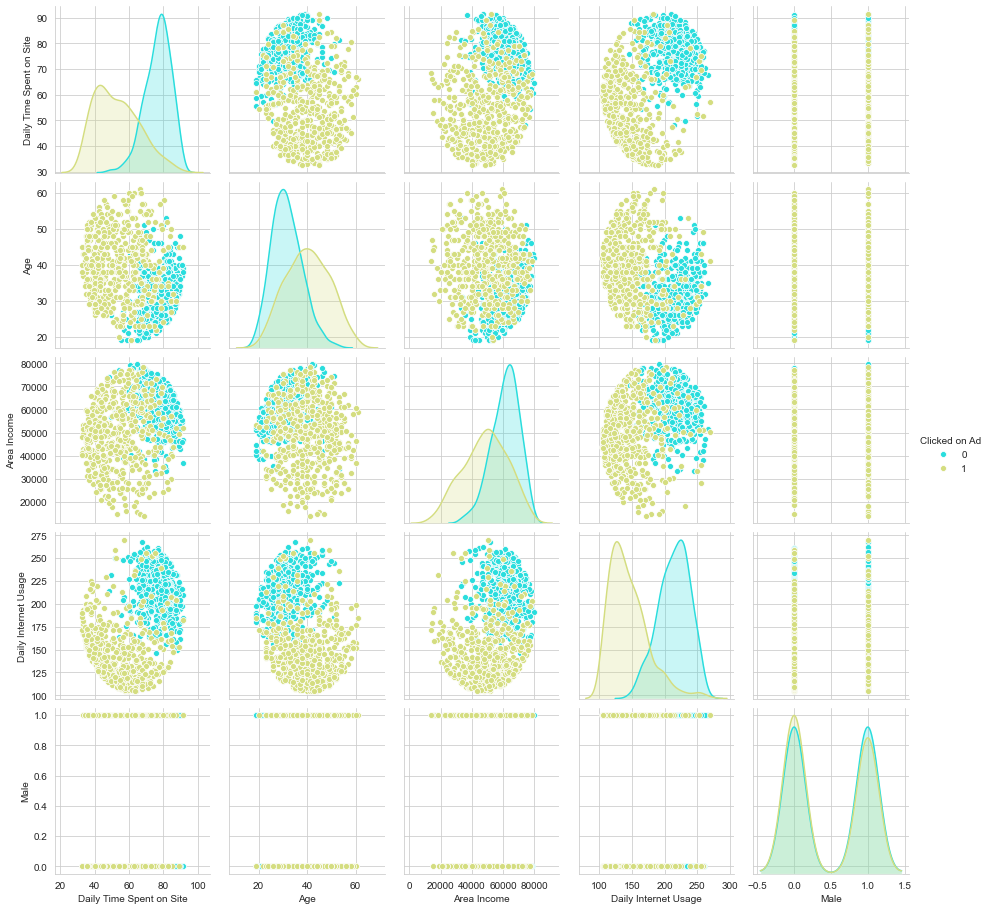

In [10]:
# Criando um pairplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'.
sns.pairplot(df,hue='Clicked on Ad',palette='rainbow')
plt.show()


# Regressão Logística

** Dividindo os dados em conjunto de treinamento e conjunto de testes **

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'],axis = 1),
                                                df['Clicked on Ad'],
                                                test_size=0.30, random_state=101)

** Treinando o modelo de regressão logística. **

In [12]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Previsões e avaliações


In [13]:
prediction = lm.predict(x_test)

In [14]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Conclusao

**O modelo de Machine Learning** e' capaz de prever com **93% de Acuracia** se o cliente que esta visitando o site, clicou ou nao no anuncio, em um modelo real de negocio, isso viria bem a calhar para que se toma-se decisao quanto ao publico alvo que a loja tende atingir, ou se vale a pena fidelizar os clientes que ja possui ao inves de buscar novos clientes a principio, e assim por diante.